<a href="https://colab.research.google.com/github/KimD86/project1/blob/main/descriptiveanalystproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Descriptive Analytics Project: Crime Analysis for North East England**

**Project Objective:**
To analyse crime data across a North East area specifically the Durham constabulary area to identify trends, patterns, and hotspots. The goal is to understand the distribution and frequency of various types of crimes, identify high-risk areas, and provide insights that can assist in crime prevention and resource allocation.

In [1]:
pip install pandas matplotlib

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

In [4]:
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from folium.plugins import MeasureControl
import numpy as np

Project Scope:

Time Period: Analysis of the last five years of crime data.

Geography: Focus on all neighborhoods within the Durham area.

Crime Categories: Analyse all reported crime types, with a focus on violent crimes (e.g.,assaults, robberies) and property crimes (e.g., burglaries, thefts).


In [5]:
df_crime_july_2021=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2021-07/2021-07-durham-street.csv')

In [6]:
df_crime_august_2021=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2021-08/2021-08-durham-street.csv')

In [7]:
df_crime_september_2021=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2021-09/2021-09-durham-street.csv')

In [8]:
df_crime_october_2021=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2021-10/2021-10-durham-street.csv')

In [9]:
df_crime_november_2021=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2021-11/2021-11-durham-street.csv')

In [10]:
df_crime_december_2021=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2021-12/2021-12-durham-street.csv')

In [11]:
df_allcrime_2021=pd.concat([df_crime_july_2021, df_crime_august_2021, df_crime_september_2021, df_crime_october_2021, df_crime_november_2021, df_crime_december_2021])

In [12]:
df_allcrime_2021.sample(8)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
4927,NaN,2021-12,Durham Constabulary,Durham Constabulary,-1.522026,54.545018,On or near Sunningdale Green,E01012329,Darlington 003B,Anti-social behaviour,NaN,NaN
4294,7fc52efcfa9b24af3a501755dbb4edbf507f0617547310...,2021-12,Durham Constabulary,Durham Constabulary,-1.652115,54.632787,On or near Maughan Street,E01020801,County Durham 059A,Vehicle crime,Court result unavailable,NaN
3101,302d7acab0cab0b102d6f64e32f000c92d644601d944d7...,2021-11,Durham Constabulary,Durham Constabulary,-1.517711,54.737723,On or near Sports/Recreation Area,E01020697,County Durham 041C,Drugs,Court result unavailable,NaN
1798,b4c4e6c345148b78343c55b7fcc7e20f442511fb66ed8d...,2021-12,Durham Constabulary,Durham Constabulary,-1.549248,54.776127,On or near Laurel Avenue,E01020724,County Durham 029D,Criminal damage and arson,Status update unavailable,NaN
4834,ce5cc90dd93d84947f731994e548b87b93111e2acbde15...,2021-08,Durham Constabulary,Durham Constabulary,-1.591419,54.617482,On or near Whinlatter Place,E01020844,County Durham 061B,Violence and sexual offences,Unable to prosecute suspect,NaN
4075,2c4d409f7f4c4bc10ef8e249005d9c31e94bba259e2313...,2021-10,Durham Constabulary,Durham Constabulary,-1.602368,54.698390,On or near Silver Street,E01020836,County Durham 052E,Criminal damage and arson,Investigation complete; no suspect identified,NaN
2290,01af33f1fd98078179863eb7f319ee39adf54576aca84d...,2021-09,Durham Constabulary,Durham Constabulary,-1.648139,54.766722,On or near Doric Road,E01020715,County Durham 031C,Criminal damage and arson,Unable to prosecute suspect,NaN
1055,12cd4a7873d22a48ebf1778939d92c8662cf245915b925...,2021-08,Durham Constabulary,Durham Constabulary,-1.372548,54.836649,On or near Warkworth Crescent,E01020787,County Durham 016E,Other crime,Status update unavailable,NaN


In [13]:
df_crime_january_2022=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2022-01/2022-01-durham-street.csv')

In [14]:
df_crime_february_2022=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2022-02/2022-02-durham-street.csv')

In [15]:
df_crime_march_2022=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2022-03/2022-03-durham-street.csv')

In [16]:
df_crime_april_2022=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2022-04/2022-04-durham-street.csv')

In [17]:
df_crime_may_2022=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2022-05/2022-05-durham-street.csv')

In [18]:
df_crime_june_2022=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2022-06/2022-06-durham-street.csv')

In [19]:
df_crime_july_2022=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2022-07/2022-07-durham-street.csv')

In [20]:
df_crime_august_2022=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2022-08/2022-08-durham-street.csv')

In [21]:
df_crime_september_2022=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2022-09/2022-09-durham-street.csv')

In [22]:
df_crime_october_2022=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2022-10/2022-10-durham-street.csv')

In [23]:
df_crime_november_2022=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2022-11/2022-11-durham-street.csv')

In [24]:
df_crime_december_2022=pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2022-12/2022-12-durham-street.csv')

In [25]:
df_allcrime_2022=pd.concat([df_crime_january_2022, df_crime_february_2022, df_crime_march_2022, df_crime_april_2022, df_crime_may_2022, df_crime_june_2022, df_crime_july_2022, df_crime_august_2022, df_crime_september_2022, df_crime_october_2022, df_crime_november_2022, df_crime_december_2022])

In [26]:
df_allcrime_2022.sample(6)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
3796,9de5a1dcf8fe42228fd1ee19faac37da59c525ad691f13...,2022-12,Durham Constabulary,Durham Constabulary,-1.713769,54.635069,On or near South View,E01020895,County Durham 057C,Violence and sexual offences,Unable to prosecute suspect,NaN
2842,afc7759023698f1edfb4293fbcd0fa2344ccd4a6a99b15...,2022-10,Durham Constabulary,Durham Constabulary,-1.382689,54.759713,On or near Milton Grove,E01020761,County Durham 034B,Vehicle crime,Investigation complete; no suspect identified,NaN
3466,d00d7c5d99d62428bf898111a295f90c0417754d7b7458...,2022-11,Durham Constabulary,Durham Constabulary,-1.696480,54.712151,On or near High Street,E01020904,County Durham 046F,Violence and sexual offences,Unable to prosecute suspect,NaN
1887,NaN,2022-01,Durham Constabulary,Durham Constabulary,-1.581774,54.775785,On or near Crossgate,E01020703,County Durham 030A,Anti-social behaviour,NaN,NaN
2976,6303847e71c16ff1f81f526ac8ae2228af0ceaeaff8d10...,2022-09,Durham Constabulary,Durham Constabulary,-1.418793,54.745110,On or near,E01020790,County Durham 040C,Criminal damage and arson,Investigation complete; no suspect identified,NaN
1010,bd28be889a2e2f82ab913266a68f5102b32db015f7f16a...,2022-11,Durham Constabulary,Durham Constabulary,-1.855897,54.844250,On or near Evansleigh Road,E01034491,County Durham 014H,Burglary,Local resolution,NaN


In [27]:
df_allcrime_2023=pd.concat([pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2023-01/2023-01-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2023-02/2023-02-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2023-03/2023-03-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2023-04/2023-04-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2023-05/2023-05-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2023-06/2023-06-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2023-07/2023-07-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2023-08/2023-08-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2023-09/2023-09-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2023-10/2023-10-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2023-11/2023-11-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2023-12/2023-12-durham-street.csv') ])

In [28]:
df_allcrime_2023.sample(6)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
6047,bd095f6673f386f3f7fb86c80a0aa6f5a7197aea3b99bf...,2023-06,Durham Constabulary,Durham Constabulary,-1.516628,54.533467,On or near White Hart Crescent,E01012327,Darlington 009B,Drugs,Offender given a caution,NaN
1877,NaN,2023-12,Durham Constabulary,Durham Constabulary,-1.709785,54.772528,On or near Woodlands Road,E01020705,County Durham 031A,Anti-social behaviour,NaN,NaN
1784,f4d390ccf7f247cb710871872cb43d787119f79e20feff...,2023-10,Durham Constabulary,Durham Constabulary,-1.352249,54.780987,On or near Nursery Gardens,E01020756,County Durham 025D,Violence and sexual offences,Unable to prosecute suspect,NaN
3830,d06dabd925462f96965fe17e911cbbd4773229d9a3c8cb...,2023-03,Durham Constabulary,Durham Constabulary,-1.609886,54.700832,On or near Carr Street,E01020837,County Durham 047D,Violence and sexual offences,Unable to prosecute suspect,NaN
6029,129d9387f0bc083f1186bba2856a661c469d31afbe6248...,2023-08,Durham Constabulary,Durham Constabulary,-1.540896,54.520575,On or near Pattison Street,E01012305,Darlington 012B,Violence and sexual offences,Unable to prosecute suspect,NaN
5709,NaN,2023-07,Durham Constabulary,Durham Constabulary,-1.519669,54.540381,On or near Feetham Avenue,E01012326,Darlington 005B,Anti-social behaviour,NaN,NaN


In [29]:
df_allcrime_2024=pd.concat([pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2024-01/2024-01-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2024-02/2024-02-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2024-03/2024-03-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2024-04/2024-04-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2024-05/2024-05-durham-street.csv'), pd.read_csv('/content/drive/MyDrive/Project/d20ba0d324c43c5933d91d4362ea93f7b8174614/2024-06/2024-06-durham-street.csv') ])

In [30]:
df_allcrime_2024.sample(6)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
5779,3ddb196258d7a7e9a1a5d8795f0a65edb3922dd8aeb017...,2024-06,Durham Constabulary,Durham Constabulary,-1.551946,54.518747,On or near Chatsworth Terrace,E01012356,Darlington 014A,Violence and sexual offences,Unable to prosecute suspect,NaN
3180,NaN,2024-03,Durham Constabulary,Durham Constabulary,-1.383273,54.732531,On or near Queen'S Road,E01020793,County Durham 043B,Anti-social behaviour,NaN,NaN
1101,c0be7298c88979f578820855b5a86ddce71b4eb09dade4...,2024-02,Durham Constabulary,Durham Constabulary,-1.632966,54.835891,On or near Stobart Street,E01020604,County Durham 019A,Violence and sexual offences,Further investigation is not in the public int...,NaN
5443,9bb609491f4334850695826ed3ed567357f01eaed0e359...,2024-02,Durham Constabulary,Durham Constabulary,-1.559917,54.524519,On or near Powlett Street,E01035187,Darlington 016H,Violence and sexual offences,Unable to prosecute suspect,NaN
4554,2a7042c2b29d53e868e6a18dcd01d8ecd1144da8b9a085...,2024-04,Durham Constabulary,Durham Constabulary,-1.640042,54.633372,On or near Sunnyside Avenue,E01020841,County Durham 059F,Violence and sexual offences,Unable to prosecute suspect,NaN
2942,35900fc4cb6d59fa65ae3c3761e8b3e18fa7bc8f19b65c...,2024-02,Durham Constabulary,Durham Constabulary,-1.743672,54.715944,On or near Parking Area,E01020877,County Durham 046A,Shoplifting,Awaiting court outcome,NaN


In [31]:
# Count occurrences of each crime type
crime_counts = df_allcrime_2021['Crime type'].value_counts()

print(crime_counts)


Crime type
Violence and sexual offences    13533
Anti-social behaviour            9303
Criminal damage and arson        4609
Public order                     2949
Other theft                      1791
Shoplifting                      1663
Burglary                         1613
Vehicle crime                    1220
Other crime                       740
Drugs                             682
Bicycle theft                     216
Theft from the person             197
Possession of weapons             181
Robbery                            92
Name: count, dtype: int64


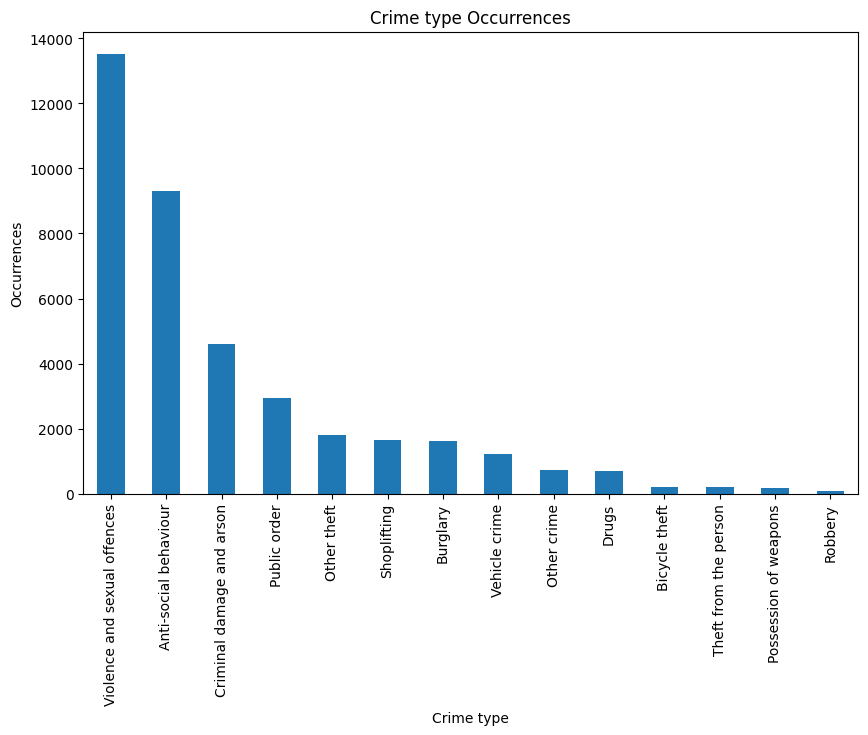

In [32]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar')
plt.title('Crime type Occurrences')
plt.xlabel('Crime type')
plt.ylabel('Occurrences')
plt.show()


In [33]:
# Count occurrences of each crime type
crime_counts = df_allcrime_2022['Crime type'].value_counts()

print(crime_counts)


Crime type
Violence and sexual offences    26975
Anti-social behaviour           16311
Criminal damage and arson        9446
Public order                     6567
Shoplifting                      4482
Other theft                      4129
Burglary                         2967
Vehicle crime                    2508
Other crime                      1703
Drugs                            1458
Possession of weapons             443
Bicycle theft                     381
Theft from the person             224
Robbery                           196
Name: count, dtype: int64


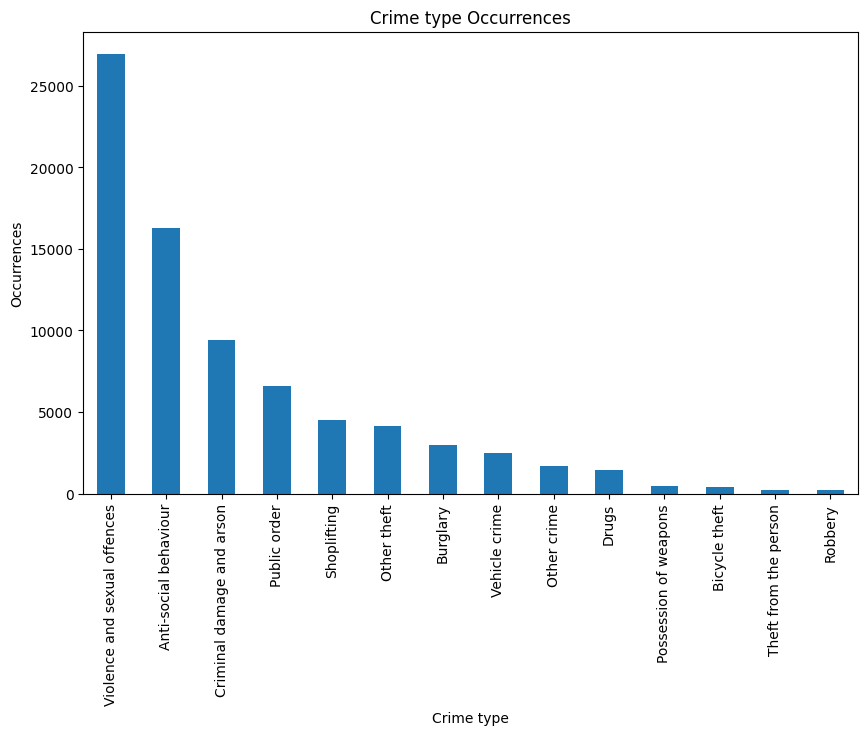

In [34]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar')
plt.title('Crime type Occurrences')
plt.xlabel('Crime type')
plt.ylabel('Occurrences')
plt.show()


In [35]:
# Count occurrences of each crime type
crime_counts = df_allcrime_2023['Crime type'].value_counts()

print(crime_counts)


Crime type
Violence and sexual offences    28771
Anti-social behaviour           11291
Criminal damage and arson        9593
Shoplifting                      6828
Public order                     6524
Other theft                      4261
Burglary                         3277
Vehicle crime                    3018
Other crime                      1942
Drugs                            1477
Possession of weapons             462
Bicycle theft                     412
Theft from the person             250
Robbery                           220
Name: count, dtype: int64


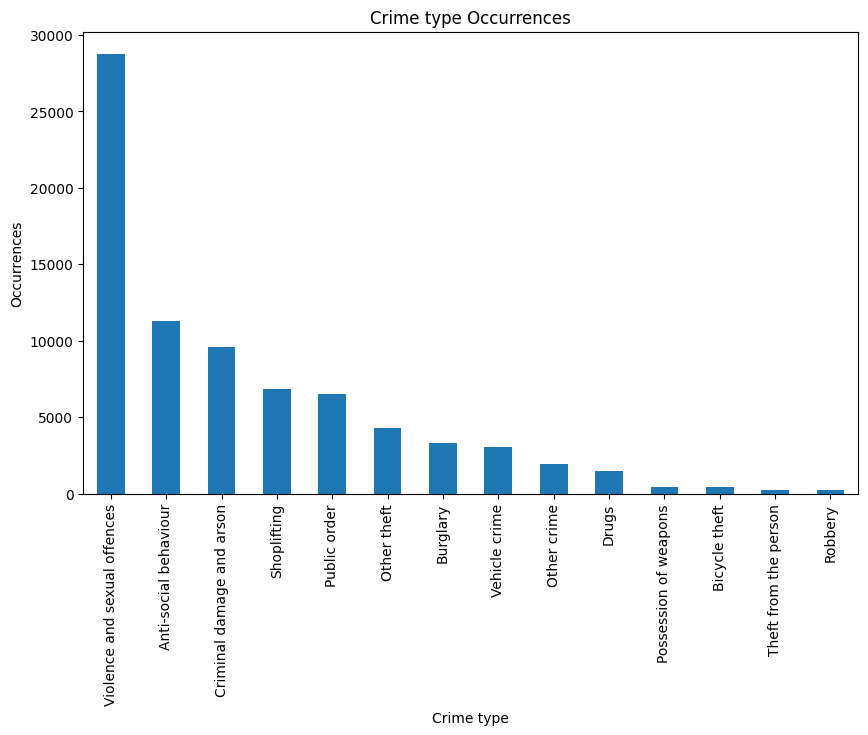

In [36]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar')
plt.title('Crime type Occurrences')
plt.xlabel('Crime type')
plt.ylabel('Occurrences')
plt.show()


In [37]:
# Count occurrences of each crime type
crime_counts = df_allcrime_2024['Crime type'].value_counts()

print(crime_counts)


Crime type
Violence and sexual offences    12905
Anti-social behaviour            6109
Criminal damage and arson        4343
Shoplifting                      3588
Public order                     2348
Other theft                      1828
Burglary                         1638
Vehicle crime                    1542
Other crime                       960
Drugs                             635
Possession of weapons             296
Bicycle theft                     193
Robbery                           117
Theft from the person              88
Name: count, dtype: int64


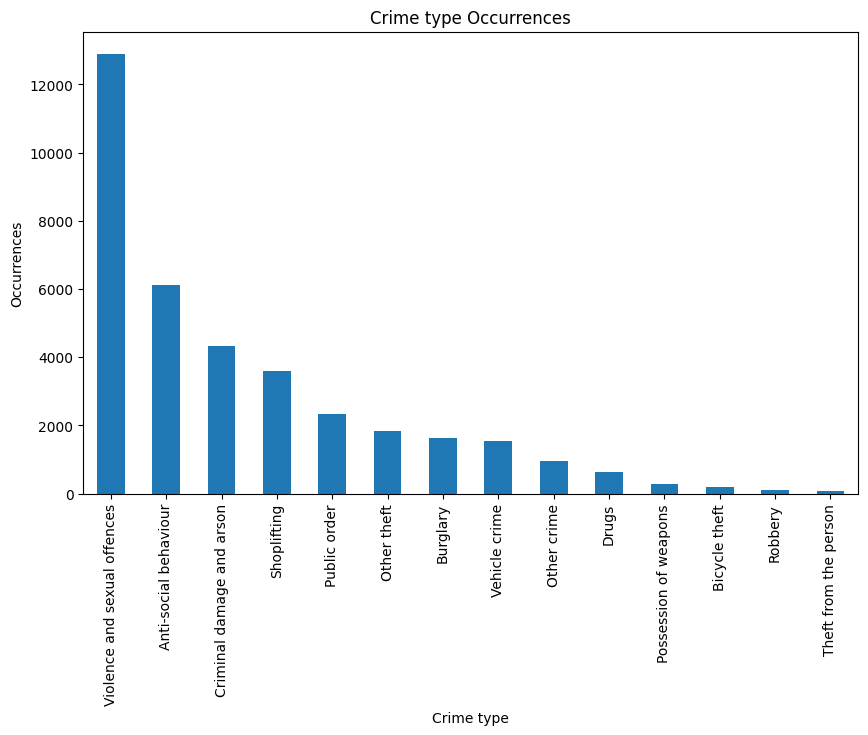

In [38]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar')
plt.title('Crime type Occurrences')
plt.xlabel('Crime type')
plt.ylabel('Occurrences')
plt.show()


In [39]:
df_allcrime_2021[['Latitude', 'Longitude']] = df_allcrime_2021[['Latitude', 'Longitude']].astype(float)


In [40]:
print(df_allcrime_2021.head())


                                            Crime ID    Month  \
0                                                NaN  2021-07   
1                                                NaN  2021-07   
2  37c490580c2cca8ff2a82f7c6dbd391530dfb9b2202b78...  2021-07   
3  0139423975699fc1d14f551657ec9e17db39336512bc25...  2021-07   
4                                                NaN  2021-07   

           Reported by         Falls within  Longitude   Latitude  \
0  Durham Constabulary  Durham Constabulary  -1.737046  54.907449   
1  Durham Constabulary  Durham Constabulary  -1.727867  54.906261   
2  Durham Constabulary  Durham Constabulary  -1.735064  54.895727   
3  Durham Constabulary  Durham Constabulary  -1.727867  54.906261   
4  Durham Constabulary  Durham Constabulary  -1.724500  54.906065   

                  Location  LSOA code           LSOA name  \
0   On or near Valley View  E01020634  County Durham 001A   
1     On or near Park View  E01020634  County Durham 001A   
2   On or n

In [41]:
avg_lat = df_allcrime_2021['Latitude'].mean()
avg_lon = df_allcrime_2021['Longitude'].mean()
map_crimes = folium.Map(location=[avg_lat, avg_lon], zoom_start=13)

In [42]:
for lat, lon in zip(df_allcrime_2021['Latitude'], df_allcrime_2021['Longitude']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='blue',
                        fill=True,
                        fill_color='blue').add_to(map_crimes)

In [43]:
map_crimes.save('crimes_map.html')

In [44]:
marker_colors = ['red', 'blue', 'green', 'purple', 'orange']

In [45]:
for index, row in df_allcrime_2021.iterrows():
    color = marker_colors[index % len(marker_colors)]  # Cycle through colors
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Crime at {row['Location']}",
    ).add_to(map_crimes)

In [46]:
map_crimes.save('crimes_map1.html')

In [47]:
from folium import Icon

In [48]:
custom_icon = Icon(icon_url="path/to/icon.png", icon_size=(20, 20))


In [49]:
folium.Marker(
    location=[row['Latitude'], row['Longitude']],
    icon=custom_icon,
    popup="Crime type",
).add_to(map_crimes)

In [50]:
folium.CircleMarker(
    location=[row['Latitude'], row['Longitude']],
    radius=5,
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.6,
    popup="Crime Type: Theft | Date: 08/18/2021",
).add_to(map_crimes)

In [51]:
map_crimes.save('crimes_map2.html')

In [52]:
pip install folium pandas geopandas

In [53]:
from geopandas import GeoDataFrame, GeoSeries


Modify the code to filter the data by specific types of crimes or time periods.

In [54]:
from datetime import datetime

In [55]:
start_date = datetime.strptime('01-01-2020', '%m-%d-%Y')
end_date = datetime.strptime('12-31-2020', '%m-%d-%Y')

In [56]:
df_allcrime_2022['Month'] = pd.to_datetime(df_allcrime_2022['Month'])

In [57]:
filtered_df = df_allcrime_2022[(df_allcrime_2022['Crime type'] == 'Burglary') &
                 (df_allcrime_2022['Month'].dt.date.between(start_date.date(), end_date.date()))]

In [58]:
print(filtered_df.columns)

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')


In [59]:
gdf_filtered = GeoDataFrame(filtered_df, geometry=GeoSeries([Point(xy) for xy in zip(filtered_df.Longitude, filtered_df.Latitude)]))

In [60]:
if gdf_filtered.empty:
  default_location = [51.5074, 0.1278]
map_filtered_crime = folium.Map(location=default_location, zoom_start=13)

In [61]:
import numpy as np


In [62]:
print(df_allcrime_2022.isnull().sum())

Crime ID                 16311
Month                        0
Reported by                  0
Falls within                 0
Longitude                    0
Latitude                     0
Location                     0
LSOA code                    1
LSOA name                    1
Crime type                   0
Last outcome category    16311
Context                  77790
dtype: int64


In [63]:
df_cleaned = df_allcrime_2022.dropna()